# In this notebook we will plot variables of the dataframe we will be analysing (barrel in this case) and also look at correlations.
### Start with imports and read in the dataframe.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import IPython

### Run one of the cells below. 

In [10]:
import pandas as pd
import numpy as np
fileLocation = '/eos/user/r/rkamalie/'
barrel_df = pd.read_parquet(fileLocation + 'final_barrel_df.parquet')
# about 10 seconds

In [18]:
import pandas as pd
import pyarrow.feather as feather
fileLocation = '/eos/user/r/rkamalie/'
barrel_df = feather.read_feather(fileLocation + 'final_barrel_df.feather')
# about 1-70 seconds!

In [11]:
#memory usage and release 
#https://stackoverflow.com/questions/39100971/how-do-i-release-memory-used-by-a-pandas-dataframe

import os, psutil, numpy as np    
def usage():
    process = psutil.Process(os.getpid())
    return process.memory_info()[0] / float(2 ** 20)


In [13]:
usage()

2809.1640625

In [5]:
#reset -f

In [82]:
whos

Variable               Type           Data/Info
-----------------------------------------------
IPython                module         <module 'IPython' from '/<...>es/IPython/__init__.pyc'>
ax                     AxesSubplot    AxesSubplot(0.13669,0.180566;0.812558x0.743739)
barrel_df              DataFrame                      rho  sc_r<...>604800 rows x 36 columns]
bins                   ndarray        11: 11 elems, type `float32`, 44 bytes
fileLocation           str            /eos/user/r/rkamalie/
i                      int            35
left                   float64        0.0
n                      ndarray        10: 10 elems, type `float64`, 80 bytes
np                     module         <module 'numpy' from '/cv<...>ages/numpy/__init__.pyc'>
os                     module         <module 'os' from '/cvmfs<...>pt/lib/python2.7/os.pyc'>
patches                silent_list    <a list of 10 Patch objects>
pd                     module         <module 'pandas' from '/c<...>ges/pandas

In [5]:
def print_long_dataframe():
    pd.set_option('display.max_columns', None)  
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('max_colwidth', -1)
print_long_dataframe()

### It is very important to make sure the variables make sense. The function 'describe()' cannot be overrated!

In [38]:
barrel_df.describe()


,rho,sc_rawEnergy,sc_rawESEnergy,sc_etaWidth,sc_phiWidth,sc_numberOfClusters,sc_dEtaSeedSC,sc_dPhiSeedSC,sc_iEtaOrX,sc_iPhiOrY,sc_iEtaMod5,sc_iPhiMod2,sc_iEtaMod20,sc_iPhiMod20,ssFull_sigmaIEtaIEta,ssFull_sigmaIEtaIPhi,ssFull_sigmaIPhiIPhi,ele_hademTow,ele_nrSatCrys,mc_energy,sc_seedClusEnergy_over_sc_rawEnergy,ssFull_e5x5_over_sc_rawEnergy,ssFull_e3x3_over_sc_rawEnergy,ssFull_eMax_over_ssFull_e5x5,ssFull_e2nd_over_ssFull_e5x5,ssFull_eTop_over_ssFull_e5x5,ssFull_eBottom_over_ssFull_e5x5,ssFull_eLeft_over_ssFull_e5x5,ssFull_eRight_over_ssFull_e5x5,ssFull_e2x5Max_over_ssFull_e5x5,ssFull_e2x5Left_over_ssFull_e5x5,ssFull_e2x5Right_over_ssFull_e5x5,ssFull_e2x5Top_over_ssFull_e5x5,ssFull_e2x5Bottom_over_ssFull_e5x5,meas_energy,Emc_over_Emeas
count,8.604800e+06,8.604800e+06,8604800.0,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8604800.0,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06,8.604800e+06
mean,1.993312e+01,2.088408e+02,0.0,8.282442e-03,2.267043e-02,2.819328e+00,-6.000560e-07,-8.303765e-06,-1.041085e-01,1.807342e+02,8.743957e-04,5.004235e-01,-8.133949e-03,9.514298e+00,8.967754e-03,-3.373731e-03,1.245964e-02,3.639736e-03,0.0,2.156655e+02,9.556687e-01,9.719350e-01,9.127039e-01,5.814700e-01,1.848440e-01,9.064155e-02,9.060916e-02,5.227534e-02,5.290156e-02,9.520532e-01,1.033461e-01,1.046839e-01,1.541710e-01,1.537542e-01,2.088408e+02,1.078456e+00
std,1.276103e+01,1.336567e+02,0.0,1.810990e-03,1.767361e-02,2.053480e+00,1.302780e-03,6.644111e-03,4.894718e+01,1.045375e+02,2.436248e+00,4.999999e-01,1.070132e+01,5.811683e+00,9.460002e-04,9.930093e-02,2.934863e-03,3.363293e-01,0.0,1.362011e+02,9.621000e-02,1.575218e-01,1.439846e-01,1.402599e-01,9.465282e-02,9.330297e-02,9.329543e-02,7.224157e-02,7.229788e-02,1.397212e-02,1.081271e-01,1.084513e-01,1.269594e-01,1.269048e-01,1.336567e+02,1.258465e+00
min,0.000000e+00,2.808963e-01,0.0,2.126136e-04,4.063789e-05,1.000000e+00,-9.987355e-02,-3.811861e-01,-8.500000e+01,1.000000e+00,-4.000000e+00,0.000000e+00,-1.900000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,2.690318e-04,0.000000e+00,0.0,1.120957e+00,1.644615e-01,1.988927e-01,1.545707e-01,5.239881e-03,4.797683e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.298138e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.808963e-01,1.287299e-01
25%,9.218432e+00,1.002411e+02,0.0,7.217530e-03,1.040706e-02,1.000000e+00,-1.002429e-04,-5.385262e-04,-4.200000e+01,9.000000e+01,-2.000000e+00,0.000000e+00,-9.000000e+00,4.000000e+00,8.719118e-03,-5.687158e-02,1.033538e-02,0.000000e+00,0.0,1.059380e+02,9.619800e-01,9.679362e-01,9.021573e-01,4.708541e-01,1.048821e-01,2.210198e-02,2.204533e-02,1.086841e-02,1.112711e-02,9.455189e-01,3.401419e-02,3.469518e-02,5.524228e-02,5.486086e-02,1.002411e+02,1.005088e+00
50%,1.937348e+01,1.954058e+02,0.0,8.037896e-03,1.705686e-02,2.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.810000e+02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,8.992155e-03,-1.011613e-03,1.122502e-02,0.000000e+00,0.0,2.020149e+02,9.940259e-01,9.915215e-01,9.468320e-01,5.934177e-01,1.721211e-01,5.159103e-02,5.159243e-02,2.175028e-02,2.237645e-02,9.539108e-01,5.876791e-02,6.014754e-02,1.062083e-01,1.058485e-01,1.954058e+02,1.017478e+00
75%,2.954667e+01,2.926260e+02,0.0,9.288809e-03,2.868558e-02,4.000000e+00,9.807901e-05,5.250425e-04,4.200000e+01,2.720000e+02,2.000000e+00,1.000000e+00,9.000000e+00,1.500000e+01,9.309629e-03,5.199568e-02,1.413548e-02,0.000000e+00,0.0,2.984509e+02,1.000000e+00,9.987040e-01,9.608448e-01,7.020959e-01,2.540470e-01,1.280296e-01,1.280553e-01,5.652317e-02,5.794043e-02,9.593377e-01,1.234920e-01,1.259224e-01,2.189473e-01,2.184005e-01,2.926260e+02,1.044554e+00
max,8.482404e+01,6.862073e+02,0.0,1.966752

In [8]:
barrel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8604800 entries, 0 to 14985167
Data columns (total 36 columns):
rho                                    float32
sc_rawEnergy                           float32
sc_rawESEnergy                         float32
sc_etaWidth                            float32
sc_phiWidth                            float32
sc_numberOfClusters                    float32
sc_dEtaSeedSC                          float32
sc_dPhiSeedSC                          float32
sc_iEtaOrX                             float32
sc_iPhiOrY                             float32
sc_iEtaMod5                            float32
sc_iPhiMod2                            float32
sc_iEtaMod20                           float32
sc_iPhiMod20                           float32
ssFull_sigmaIEtaIEta                   float32
ssFull_sigmaIEtaIPhi                   float32
ssFull_sigmaIPhiIPhi                   float32
ele_hademTow                           float32
ele_nrSatCrys                          f

### We can look at individual variables, check min and max, and plot them.

In [39]:
#barrel_df.rho.min()
barrel_df.rho.max()
#barrel_df['rho'].idxmax()
#barrel_df.rho[3562468]

84.82404

### Run the loop below to plot all variables.

Plot number  0  out of  36  plots.


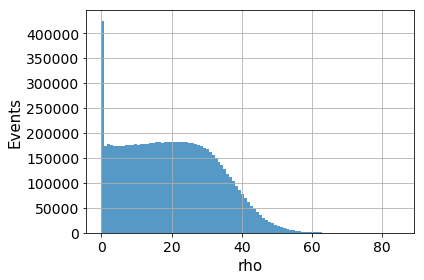

Plot number  1  out of  36  plots.


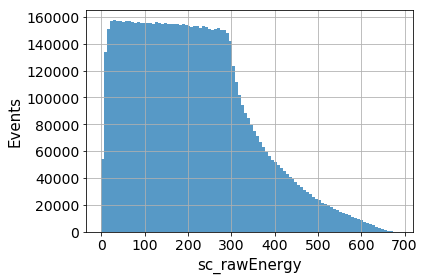

Plot number  2  out of  36  plots.


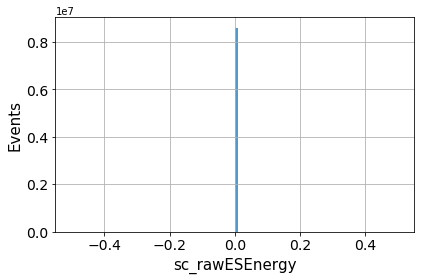

Plot number  3  out of  36  plots.


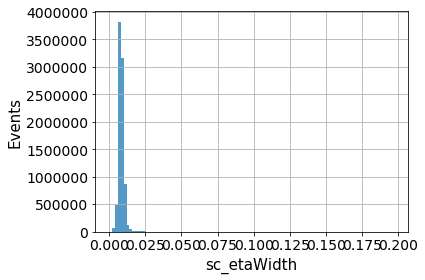

Plot number  4  out of  36  plots.


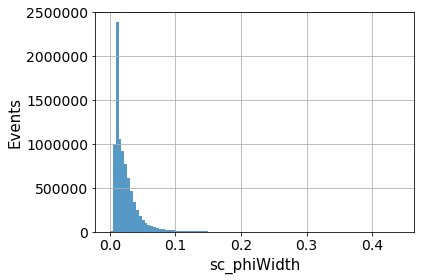

Plot number  5  out of  36  plots.


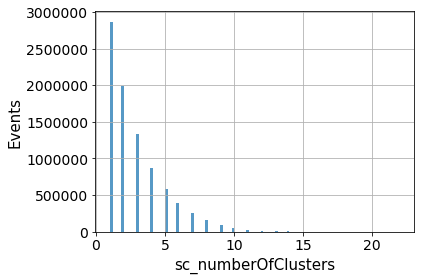

Plot number  6  out of  36  plots.


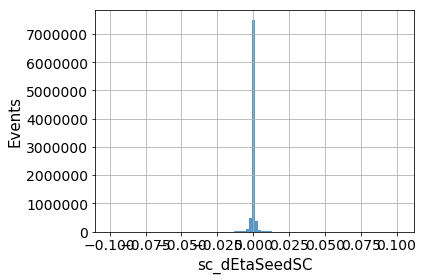

Plot number  7  out of  36  plots.


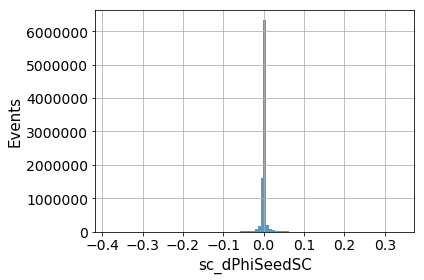

Plot number  8  out of  36  plots.


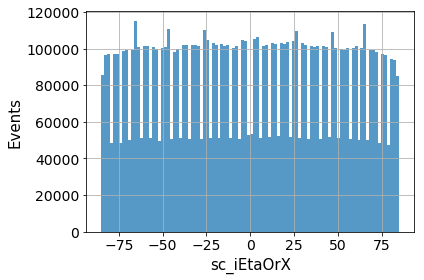

Plot number  9  out of  36  plots.


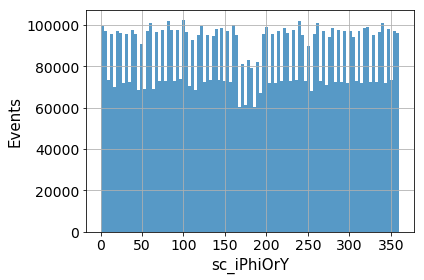

Plot number  10  out of  36  plots.


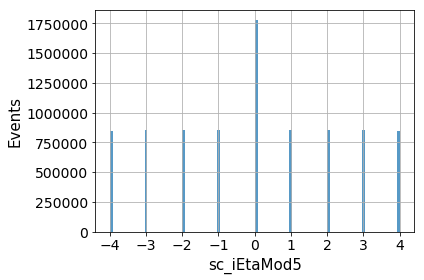

Plot number  11  out of  36  plots.


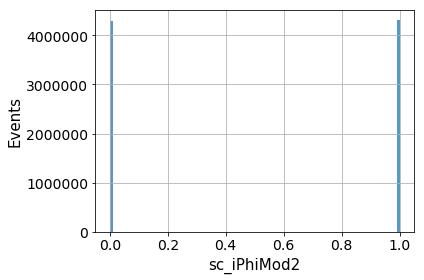

Plot number  12  out of  36  plots.


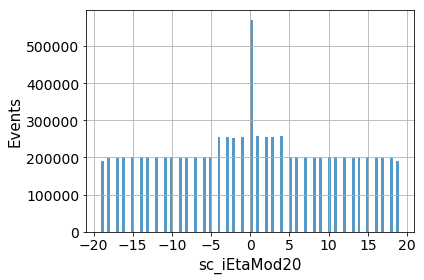

Plot number  13  out of  36  plots.


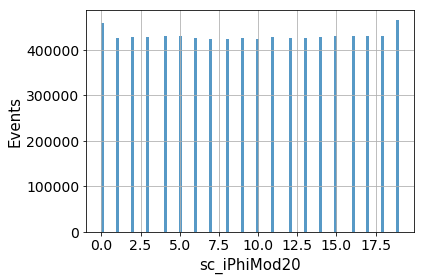

Plot number  14  out of  36  plots.


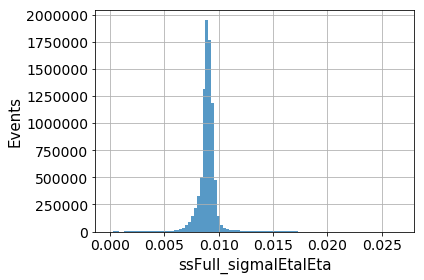

Plot number  15  out of  36  plots.


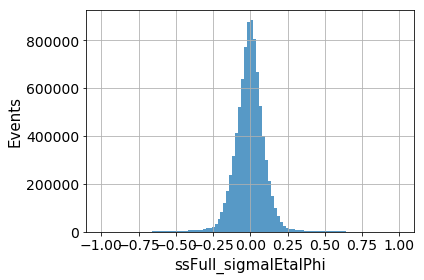

Plot number  16  out of  36  plots.


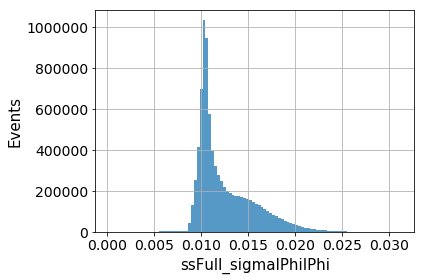

Plot number  17  out of  36  plots.


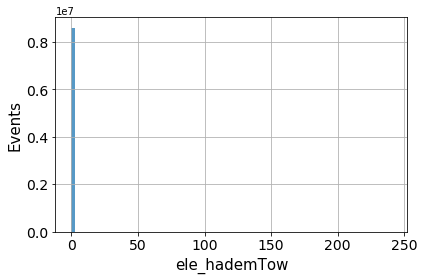

Plot number  18  out of  36  plots.


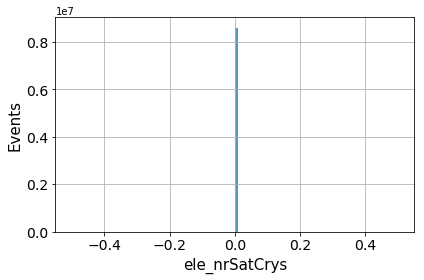

Plot number  19  out of  36  plots.


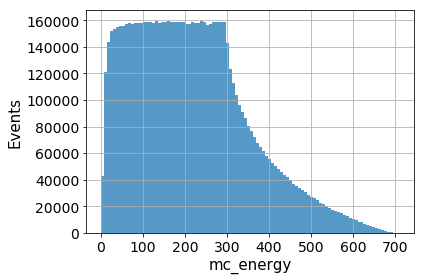

Plot number  20  out of  36  plots.


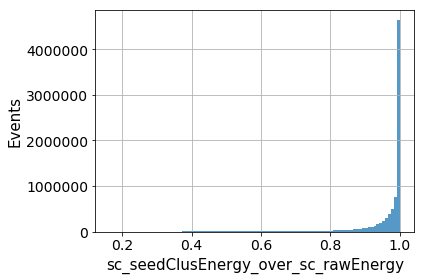

Plot number  21  out of  36  plots.


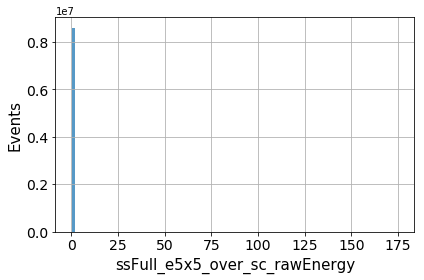

Plot number  22  out of  36  plots.


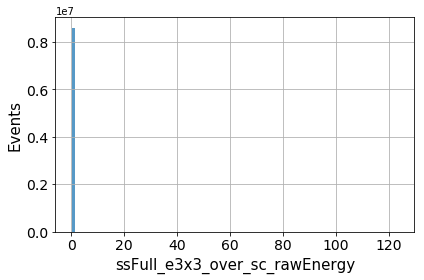

Plot number  23  out of  36  plots.


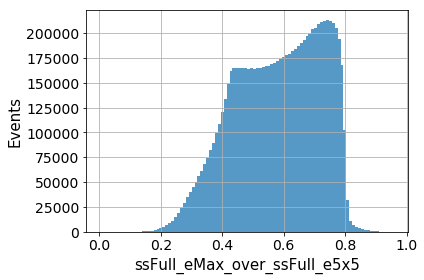

Plot number  24  out of  36  plots.


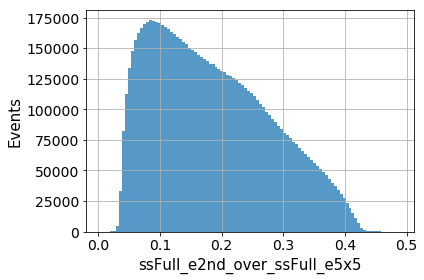

Plot number  25  out of  36  plots.


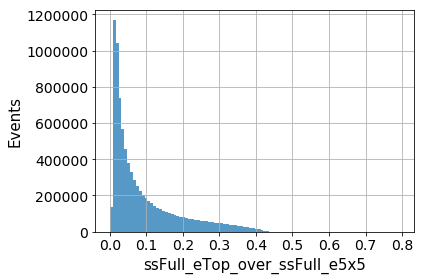

Plot number  26  out of  36  plots.


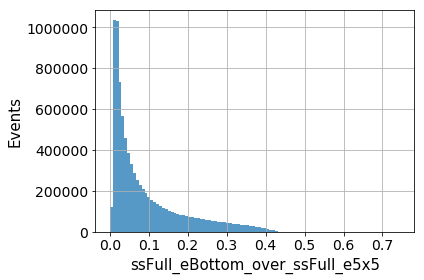

Plot number  27  out of  36  plots.


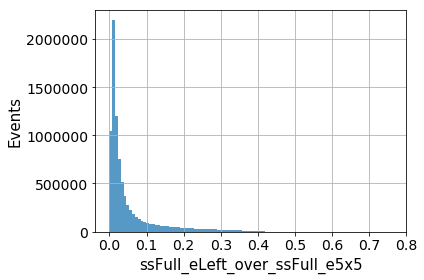

Plot number  28  out of  36  plots.


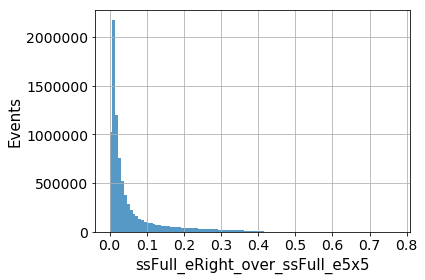

Plot number  29  out of  36  plots.


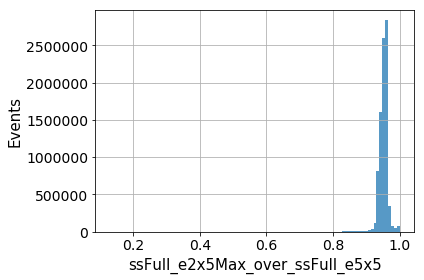

Plot number  30  out of  36  plots.


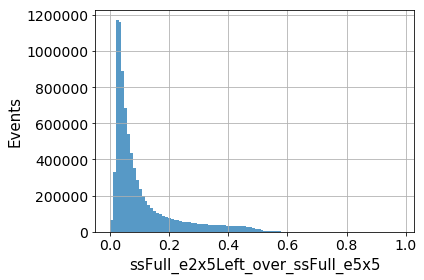

Plot number  31  out of  36  plots.


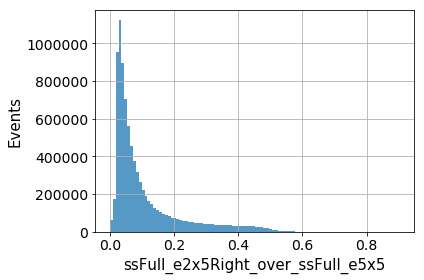

Plot number  32  out of  36  plots.


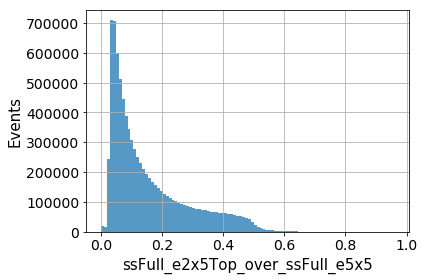

Plot number  33  out of  36  plots.


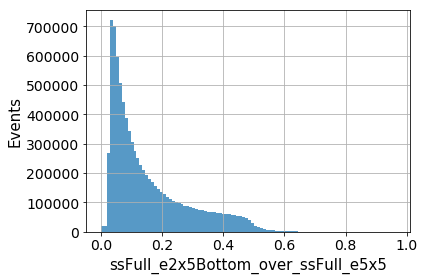

Plot number  34  out of  36  plots.


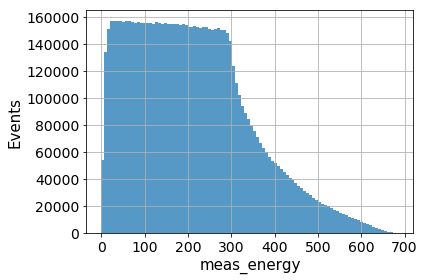

Plot number  35  out of  36  plots.


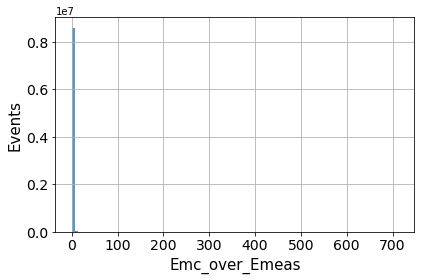

In [28]:
import matplotlib.pyplot as plt
for i in range(0, barrel_df.shape[1]):
    print 'Plot number ', i+1, ' out of ', barrel_df.shape[1], ' plots.'
    barrel_df[barrel_df.columns[i]].plot.hist(grid=True, alpha=0.75, bins=100)
    plt.xlabel(barrel_df.columns[i], size = 15)
    plt.ylabel('Events', size=15)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.tight_layout()
    plt.savefig(barrel_df.columns[i] + ".pdf", bbox_inches='tight', dpi=400)
    plt.show()
    
    #fig, ax = plt.subplots(1, 1, sharex=True)
    #xlim = [barrel_df[barrel_df.columns[i]].min()*1.1, barrel_df[barrel_df.columns[i]].max()*1.1]
    #ax.set_xlim(xlim)

    plt.close()

In [81]:
usage()

4367.7890625

In [96]:
barrel_df.Emc_over_Emeas.min()
barrel_df.Emc_over_Emeas.max()

711.4703

### Let's plot one of the variables as the max function above clearly indicated that outliers are present for this variable.

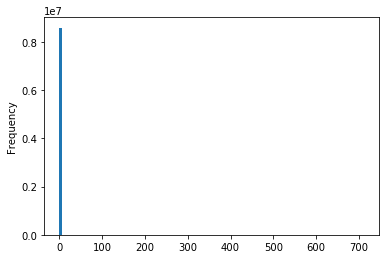

In [6]:
barrel_df.Emc_over_Emeas.plot.hist(bins=100)
#https://stackoverflow.com/questions/43638851/pandas-histogram-plot-with-kde

In [107]:
usage()

4982.96875

### Another library to plot variables (seaborn as opposet to matplotlib)

(0, 0.07376782209127089)

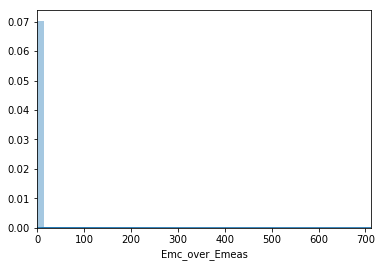

In [125]:
import seaborn as sns
from scipy.stats import norm
#ax = sns.distplot(df.rho, fit=norm, kde=True)
ax = sns.distplot(df.Emc_over_Emeas, kde=True)
i = df.Emc_over_Emeas
ax.set_xlim(i.min()-i.std(), i.max()+i.std())
#ax.set_xlim(0.,5)
ax.set_ylim(bottom=0)

#ax.set_xlabel("Number of questions", {'size':'14'})
#ax.set_ylabel("Ratio of dialogues", {'size':'14'})

In [7]:
len(barrel_df.columns)

36

In [5]:
df = barrel_df

In [6]:
df.isna().values.any()

False

### Let's look at correlations, notice that for barrel sc_rawESEnergy will have NaN's, so we need to remove it before plotting (not a big problem, but it will be just a blank line for that variable.)

In [32]:
corr = df.corr()
corr

,rho,sc_rawEnergy,sc_rawESEnergy,sc_etaWidth,sc_phiWidth,sc_numberOfClusters,sc_dEtaSeedSC,sc_dPhiSeedSC,sc_iEtaOrX,sc_iPhiOrY,...,ssFull_eBottom_over_ssFull_e5x5,ssFull_eLeft_over_ssFull_e5x5,ssFull_eRight_over_ssFull_e5x5,ssFull_e2x5Max_over_ssFull_e5x5,ssFull_e2x5Left_over_ssFull_e5x5,ssFull_e2x5Right_over_ssFull_e5x5,ssFull_e2x5Top_over_ssFull_e5x5,ssFull_e2x5Bottom_over_ssFull_e5x5,meas_energy,Emc_over_Emeas
rho,1.000000,0.003759,NaN,0.115095,0.177705,0.175673,-0.000186,0.000023,0.000721,0.000417,...,-0.000860,0.000148,-0.000754,-0.048389,0.003680,0.002773,0.001906,0.001990,0.003759,-0.001590
sc_rawEnergy,0.003759,1.000000,NaN,0.104700,-0.209277,0.247392,0.002697,0.000623,-0.005096,-0.002739,...,-0.032217,0.023701,0.023371,0.079237,-0.006372,-0.007015,-0.076674,-0.076723,1.000000,-0.056838
sc_rawESEnergy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_etaWidth,0.115095,0.104700,NaN,1.000000,0.371752,0.279520,-0.000001,-0.000203,-0.007991,0.002811,...,-0.073686,0.299798,0.301470,0.089197,0.308454,0.310540,0.033673,0.032900,0.104700,0.045160
sc_phiWidth,0.177705,-0.209277,NaN,0.371752,1.000000,0.643669,-0.003834,-0.001204,0.000372,-0.000429,...,0.086258,-0.031262,-0.034049,-0.021372,0.011269,0.007680,0.155053,0.155631,-0.209277,0.043150
sc_numberOfClusters,0.175673,0.247392,NaN,0.279520,0.643669,1.000000,0.001431,-0.000648,-0.003000,-0.003120,...,0.075583,-0.025012,-0.027129,0.047568,0.000221,-0.003132,0.122354,0.123435,0.247392,0.004323
sc_dEtaSeedSC,-0.000186,0.002697,NaN,-0.000001,-0.003834,0.001431,1.000000,0.010261,-0.471794,-0.001351,...,-0.007981,-0.047431,0.051400,-0.001793,-0.071552,0.075859,0.010663,-0.009097,0.002697,0.000009
sc_dPhiSeedSC,0.000023,0.000623,NaN,-0.000203,-0.001204,-0.000648,0.010261,1.000000,-0.006761,0.000645,...,0.017438,-0.001157,0.001074,0.001274,-0.001671,0.001859,-0.077520,0.077434,0.000623,0.001336
sc_iEtaOrX,0.000721,-0.005096,NaN,-0.007991,0.000372,-0.003000,-0.471794,-0.006761,1.000000,0.001655,...,0.023409,0.093114,-0.106841,0.003940,0.132899,-0.145754,-0.031331,0.030644,-0.005096,-0.000213
sc_iPhiOrY,0.000417,-0.002739,NaN,0.002811,-0.000429,-0.003120,-0.001351,0.000645,0.001655,1.000000,...,0.000358,-0.000044,-0.000513,-0.002179,0.000143,-0.000544,-0.001099,-0.000119,-0.002739,-0.000081


### Drop the row, then the column with NaNs

In [34]:
corr_wo_NaN = corr.dropna(how='all')
corr_wo_NaN
corr_clear = corr_wo_NaN.dropna(axis='columns')
corr_clear

,rho,sc_rawEnergy,sc_etaWidth,sc_phiWidth,sc_numberOfClusters,sc_dEtaSeedSC,sc_dPhiSeedSC,sc_iEtaOrX,sc_iPhiOrY,sc_iEtaMod5,...,ssFull_eBottom_over_ssFull_e5x5,ssFull_eLeft_over_ssFull_e5x5,ssFull_eRight_over_ssFull_e5x5,ssFull_e2x5Max_over_ssFull_e5x5,ssFull_e2x5Left_over_ssFull_e5x5,ssFull_e2x5Right_over_ssFull_e5x5,ssFull_e2x5Top_over_ssFull_e5x5,ssFull_e2x5Bottom_over_ssFull_e5x5,meas_energy,Emc_over_Emeas
rho,1.000000,0.003759,0.115095,0.177705,0.175673,-0.000186,0.000023,0.000721,0.000417,0.000771,...,-0.000860,0.000148,-0.000754,-0.048389,0.003680,0.002773,0.001906,0.001990,0.003759,-0.001590
sc_rawEnergy,0.003759,1.000000,0.104700,-0.209277,0.247392,0.002697,0.000623,-0.005096,-0.002739,-0.003043,...,-0.032217,0.023701,0.023371,0.079237,-0.006372,-0.007015,-0.076674,-0.076723,1.000000,-0.056838
sc_etaWidth,0.115095,0.104700,1.000000,0.371752,0.279520,-0.000001,-0.000203,-0.007991,0.002811,-0.009491,...,-0.073686,0.299798,0.301470,0.089197,0.308454,0.310540,0.033673,0.032900,0.104700,0.045160
sc_phiWidth,0.177705,-0.209277,0.371752,1.000000,0.643669,-0.003834,-0.001204,0.000372,-0.000429,0.001222,...,0.086258,-0.031262,-0.034049,-0.021372,0.011269,0.007680,0.155053,0.155631,-0.209277,0.043150
sc_numberOfClusters,0.175673,0.247392,0.279520,0.643669,1.000000,0.001431,-0.000648,-0.003000,-0.003120,-0.001093,...,0.075583,-0.025012,-0.027129,0.047568,0.000221,-0.003132,0.122354,0.123435,0.247392,0.004323
sc_dEtaSeedSC,-0.000186,0.002697,-0.000001,-0.003834,0.001431,1.000000,0.010261,-0.471794,-0.001351,-0.297195,...,-0.007981,-0.047431,0.051400,-0.001793,-0.071552,0.075859,0.010663,-0.009097,0.002697,0.000009
sc_dPhiSeedSC,0.000023,0.000623,-0.000203,-0.001204,-0.000648,0.010261,1.000000,-0.006761,0.000645,-0.005436,...,0.017438,-0.001157,0.001074,0.001274,-0.001671,0.001859,-0.077520,0.077434,0.000623,0.001336
sc_iEtaOrX,0.000721,-0.005096,-0.007991,0.000372,-0.003000,-0.471794,-0.006761,1.000000,0.001655,0.719302,...,0.023409,0.093114,-0.106841,0.003940,0.132899,-0.145754,-0.031331,0.030644,-0.005096,-0.000213
sc_iPhiOrY,0.000417,-0.002739,0.002811,-0.000429,-0.003120,-0.001351,0.000645,0.001655,1.000000,0.001826,...,0.000358,-0.000044,-0.000513,-0.002179,0.000143,-0.000544,-0.001099,-0.000119,-0.002739,-0.000081
sc_iEtaMod5,0.000771,-0.003043,-0.009491,0.001222,-0.001093,-0.297195,-0.005436,0.719302,0.001826,1.000000,...,0.029856,0.069074,-0.085203,0.007276,0.104967,-0.119753,-0.037722,0.039169,-0.003043,-0.002857


36

In [ ]:
### Plot correlations in two different styles. 

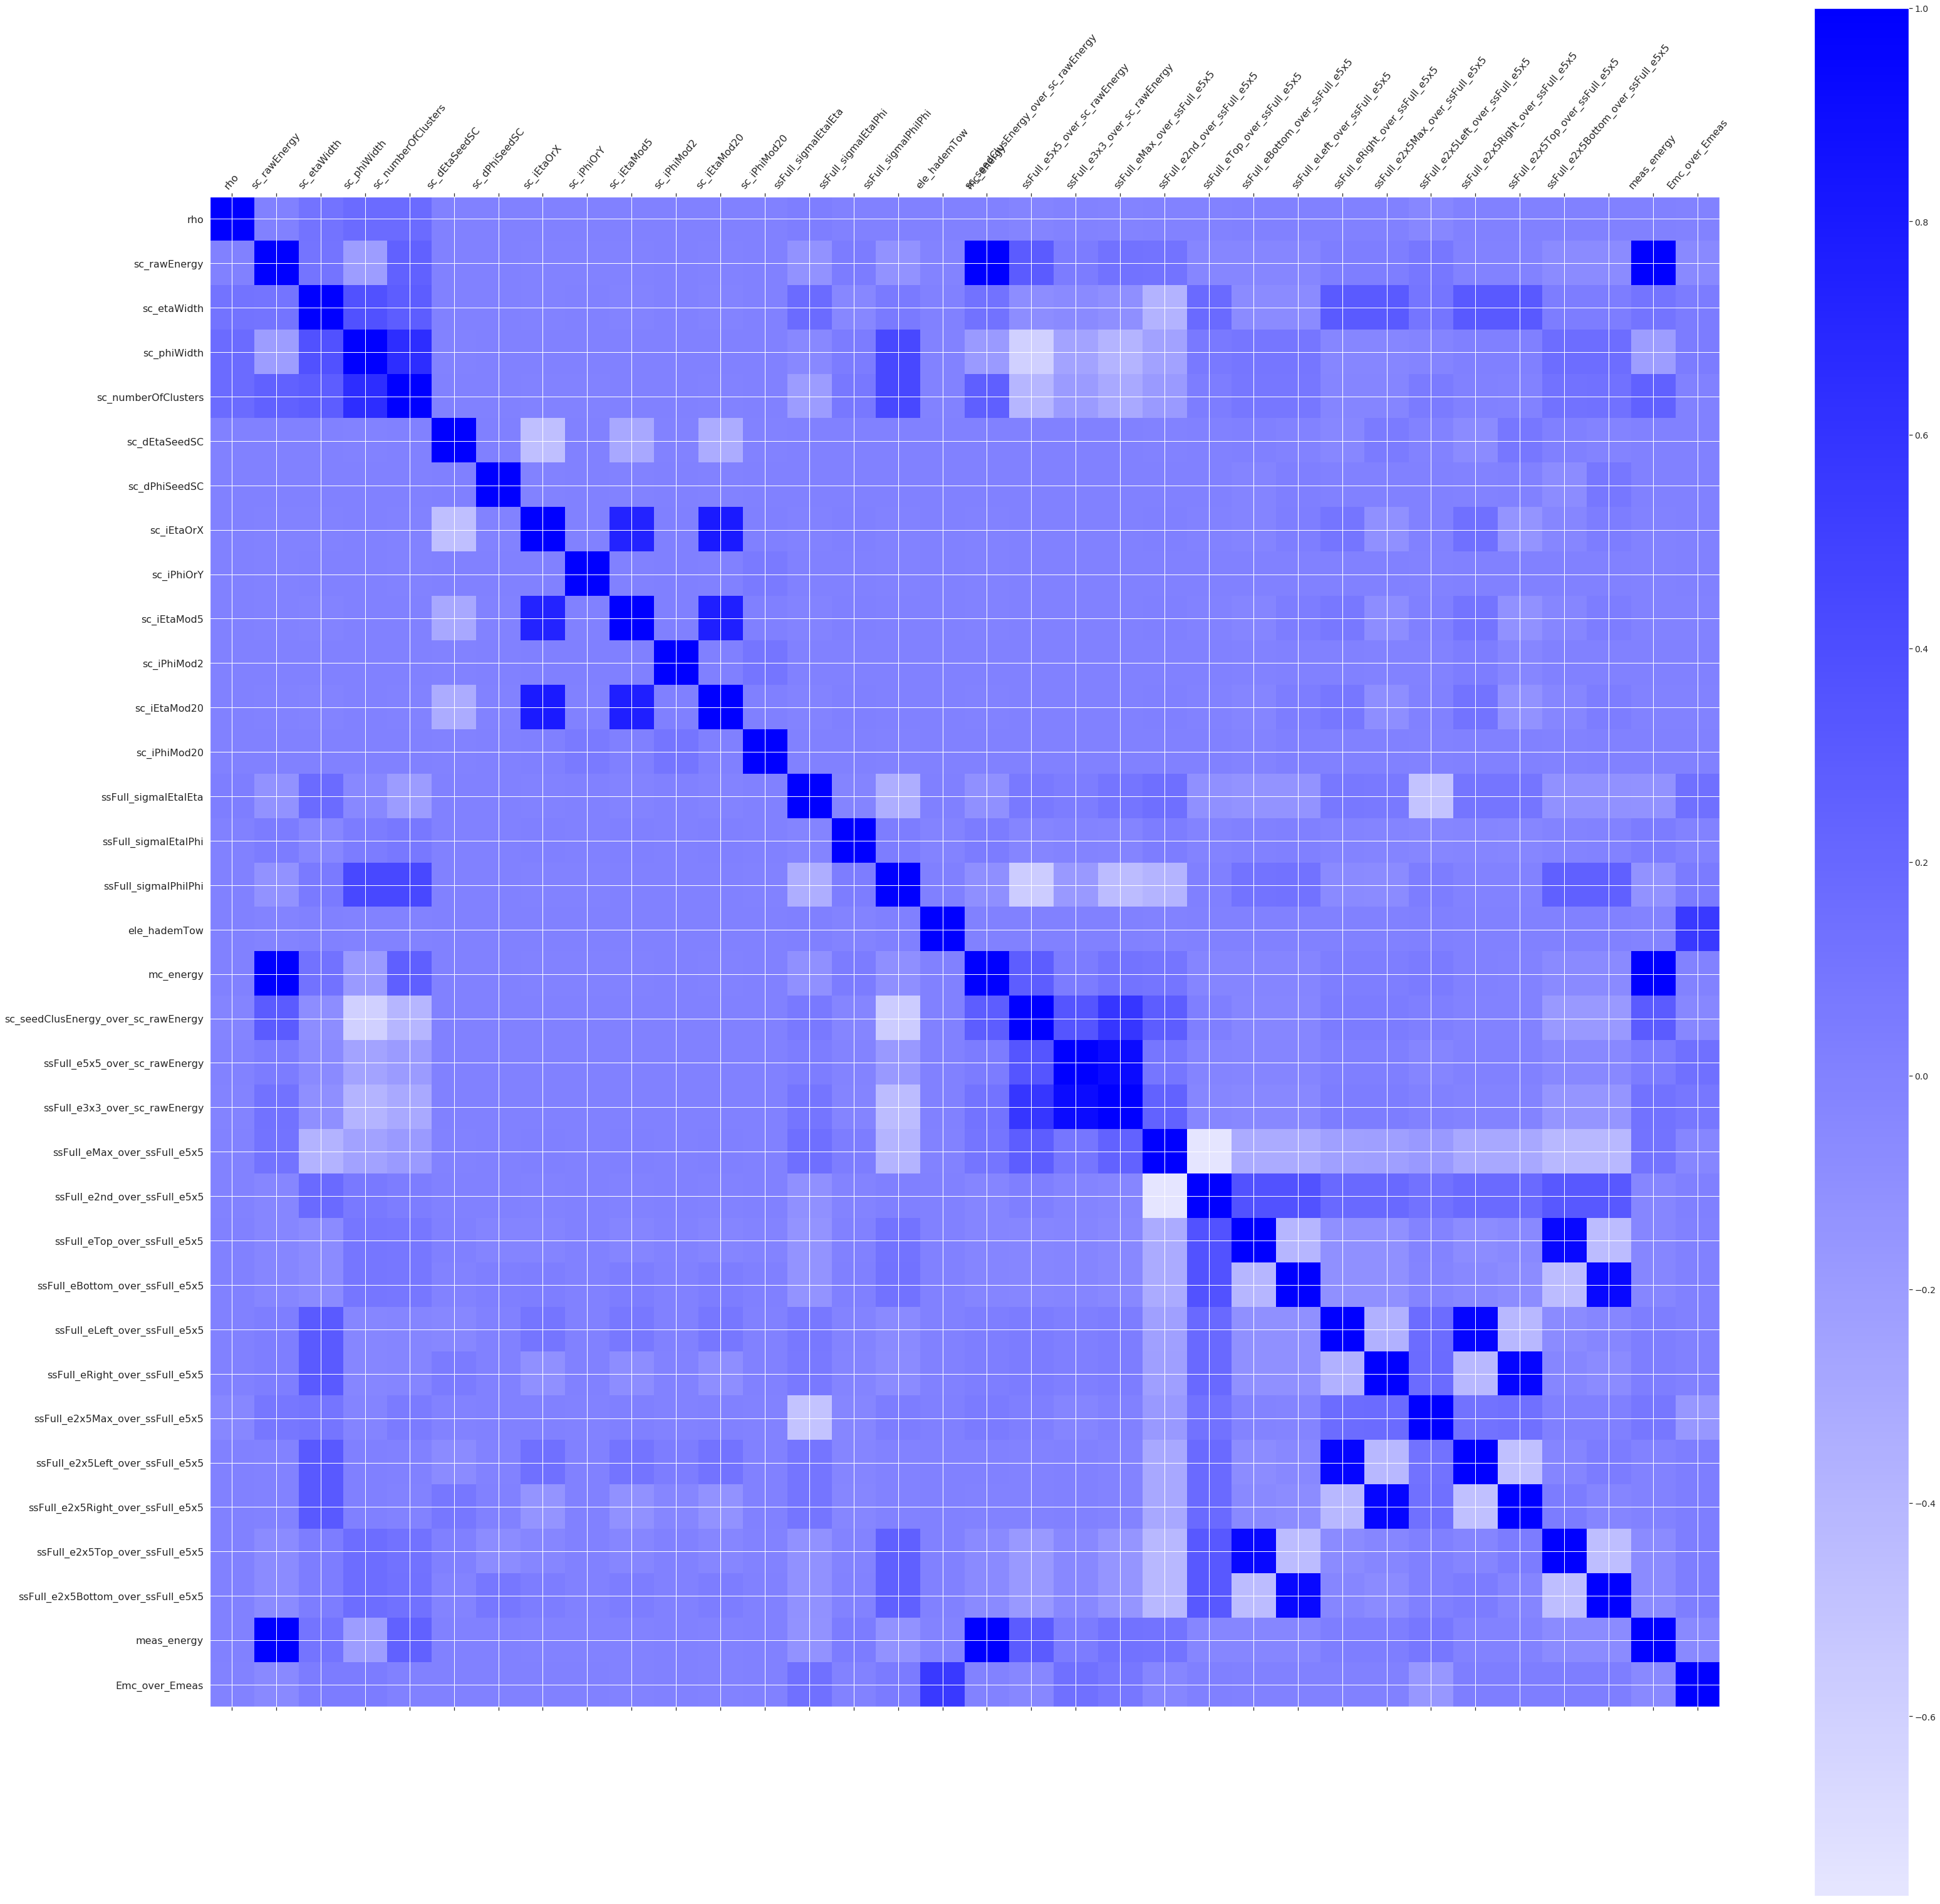

In [65]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas/50703596
f = plt.figure(figsize=(54, 54))
cm = sns.light_palette("blue", as_cmap=True)
plt.matshow(corr_clear, fignum=f.number, cmap=cm)
plt.xticks(range(corr_clear.shape[1]), corr_clear.columns, fontsize=16, rotation=50)
plt.yticks(range(corr_clear.shape[1]), corr_clear.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
#plt.title('Correlation Matrix', fontsize=16)
plt.savefig("Correlation_Matrix_barrel.pdf", bbox_inches='tight', dpi=400)

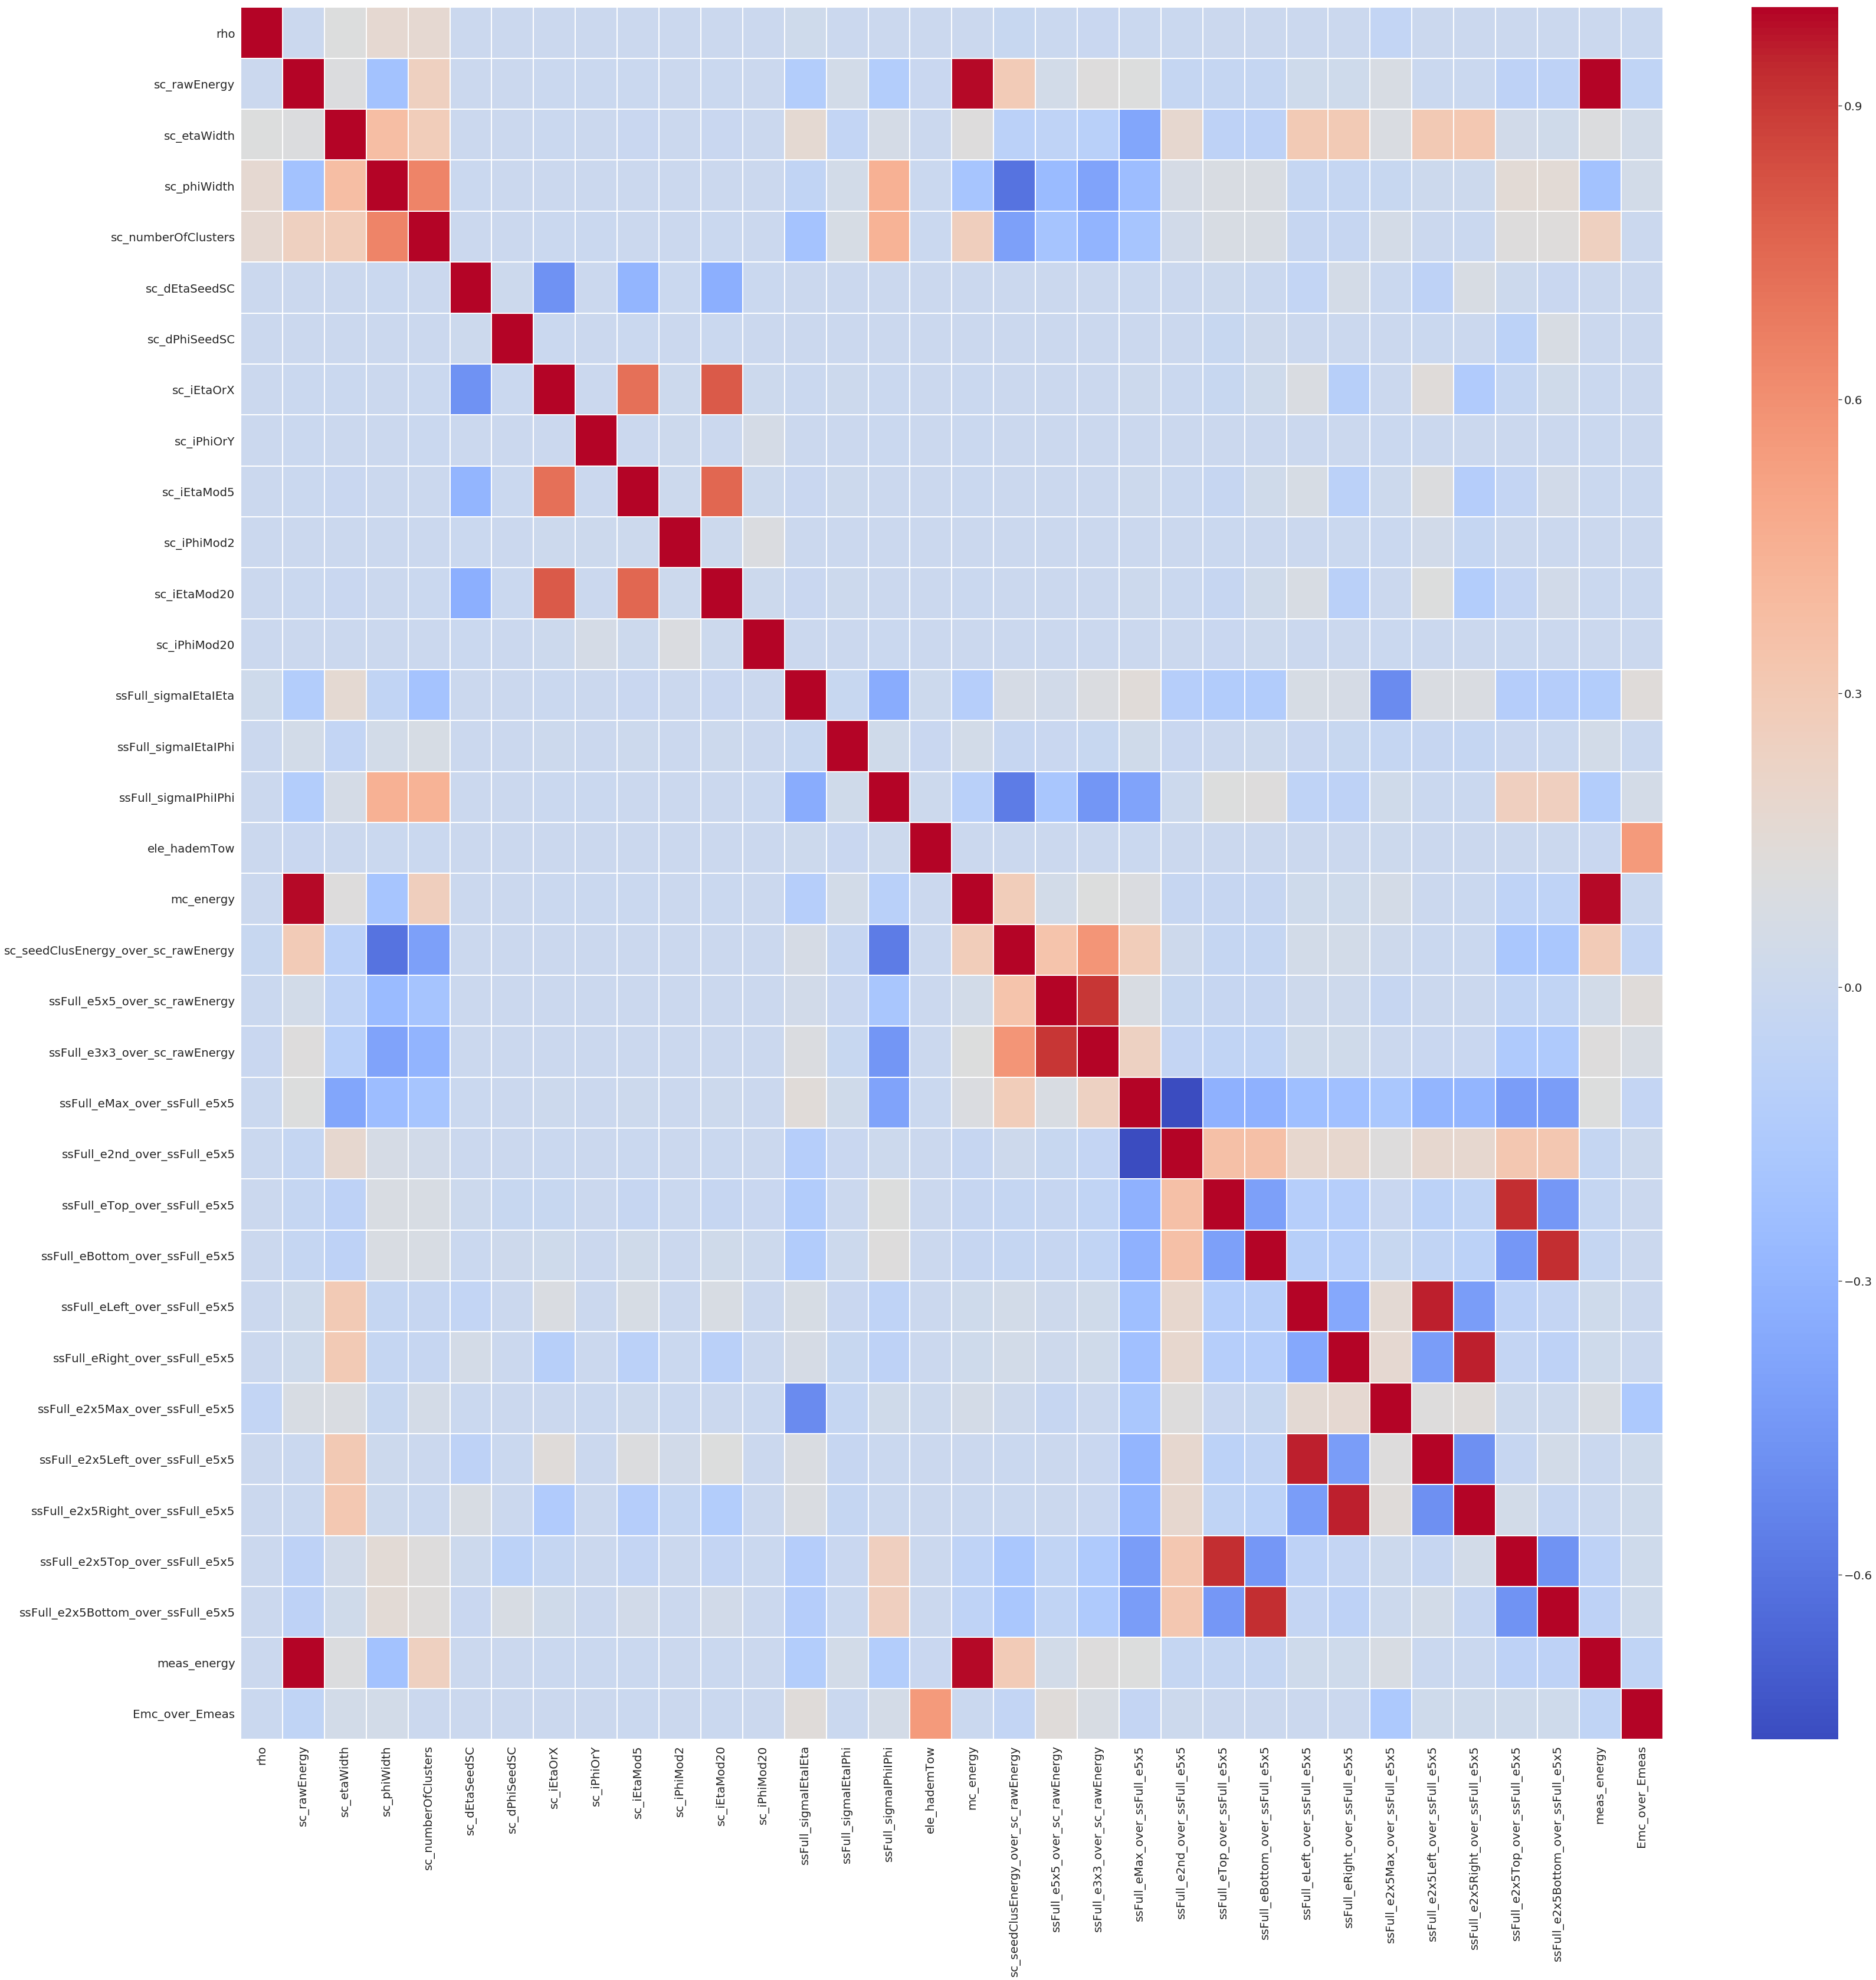

In [54]:
import seaborn as sns
#cm = sns.light_palette("light", as_cmap=True)

#s = corr_clear.style.background_gradient(cmap=cm).set_precision(2)
plt.figure(figsize=(54, 54))

svm = sns.heatmap(corr_clear, annot=False,cmap="coolwarm", linecolor='white', linewidths=1, fmt='g')#, annot_kws={"size": 16})
sns.set(font_scale=2)

figure = svm.get_figure()    
figure.savefig('barrel_corr.pdf', dpi=400)
svm

In [66]:
usage()

7306.5859375